In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data = df.copy()

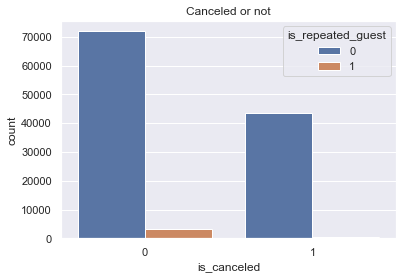

In [7]:
sns.set(style = 'darkgrid')
plt.title('Canceled or not')
ax = sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)

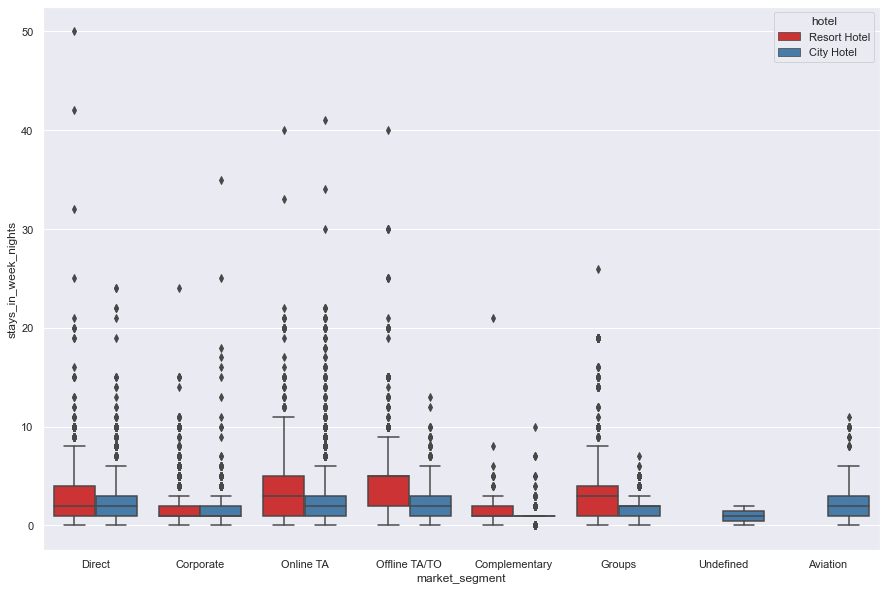

In [8]:
plt.figure(figsize = (15,10))
sns.boxplot(x='market_segment', y='stays_in_week_nights', data=data, hue="hotel", palette='Set1')
plt.show()

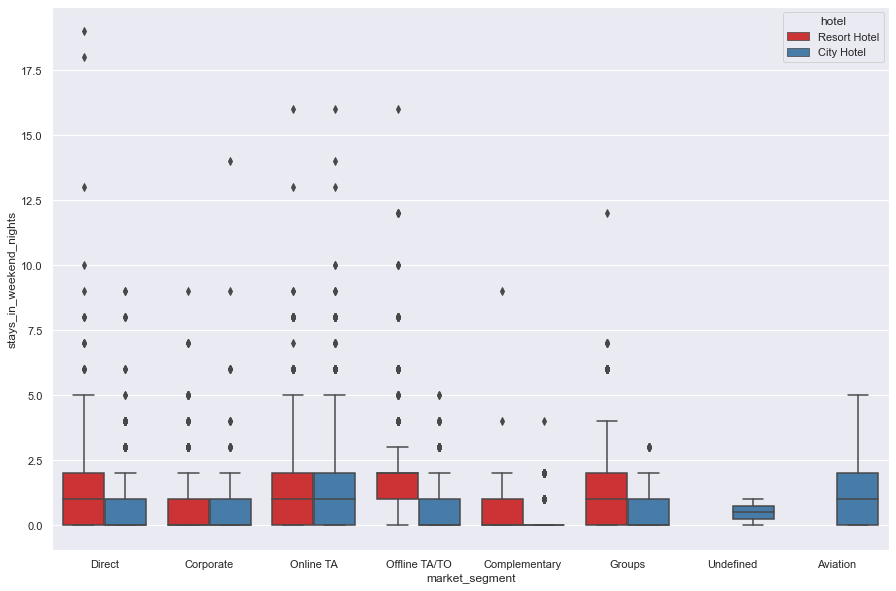

In [9]:
plt.figure(figsize = (15,10))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data=data, hue="hotel", palette='Set1')
plt.show()

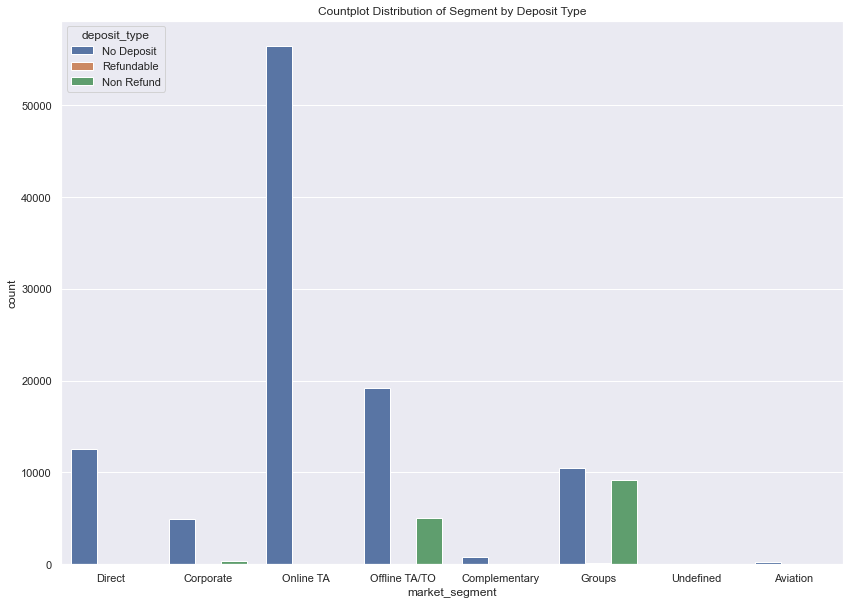

In [10]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
plt.title('Countplot Distribution of Segment by Deposit Type')
ax = sns.countplot(x='market_segment', hue='deposit_type', data=data)


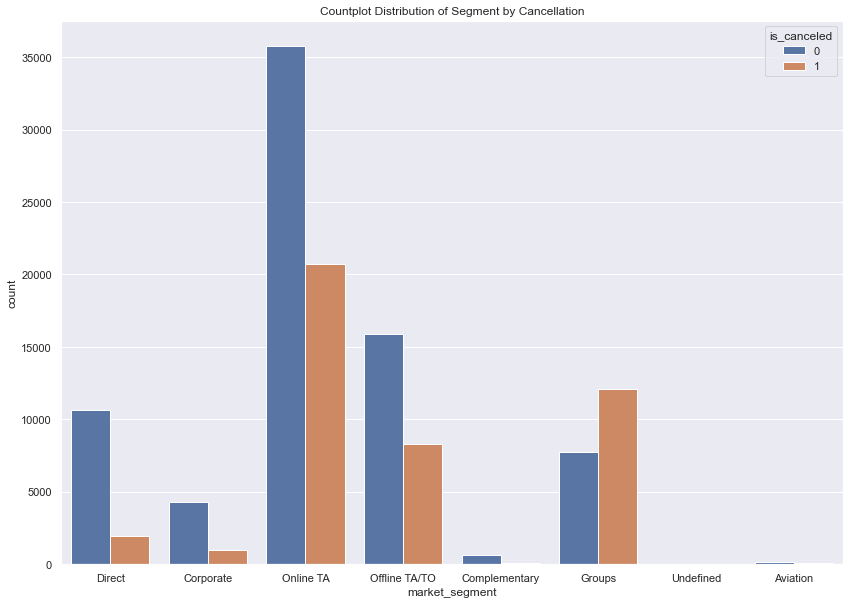

In [11]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
plt.title('Countplot Distribution of Segment by Cancellation')
ax = sns.countplot(x='market_segment', hue='is_canceled', data=data)

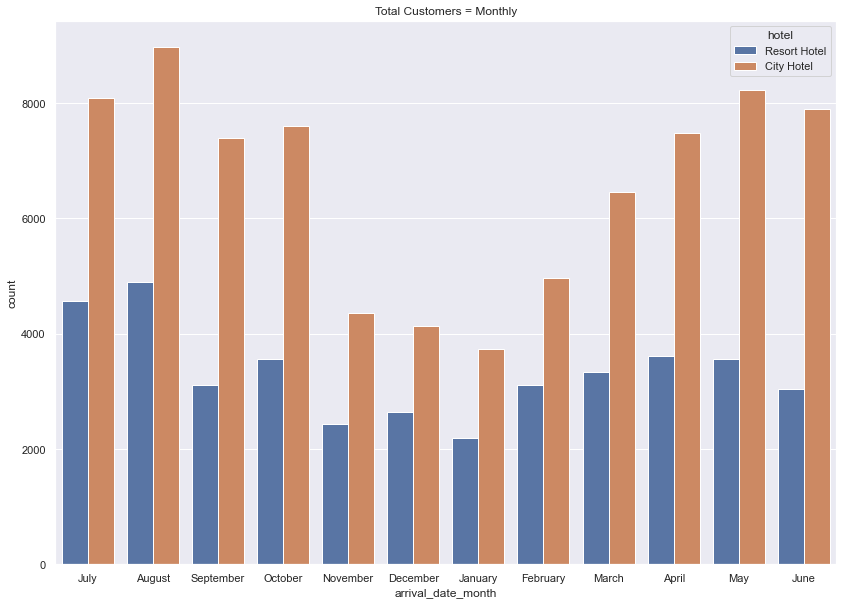

In [13]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
plt.title('Total Customers = Monthly')
ax = sns.countplot(x='arrival_date_month', hue='hotel', data=data)

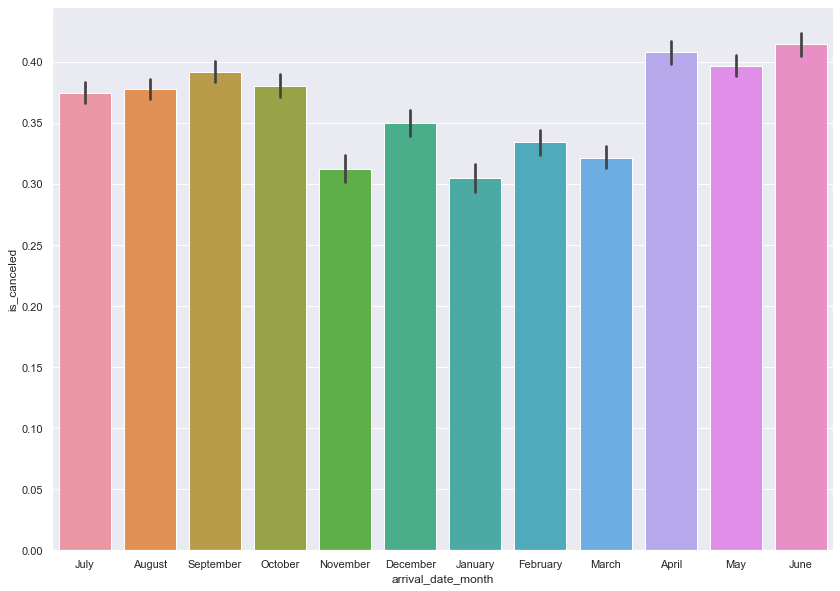

In [15]:
plt.figure(figsize=(14,10))
sns.barplot(x='arrival_date_month', y='is_canceled', data=data)
plt.show()

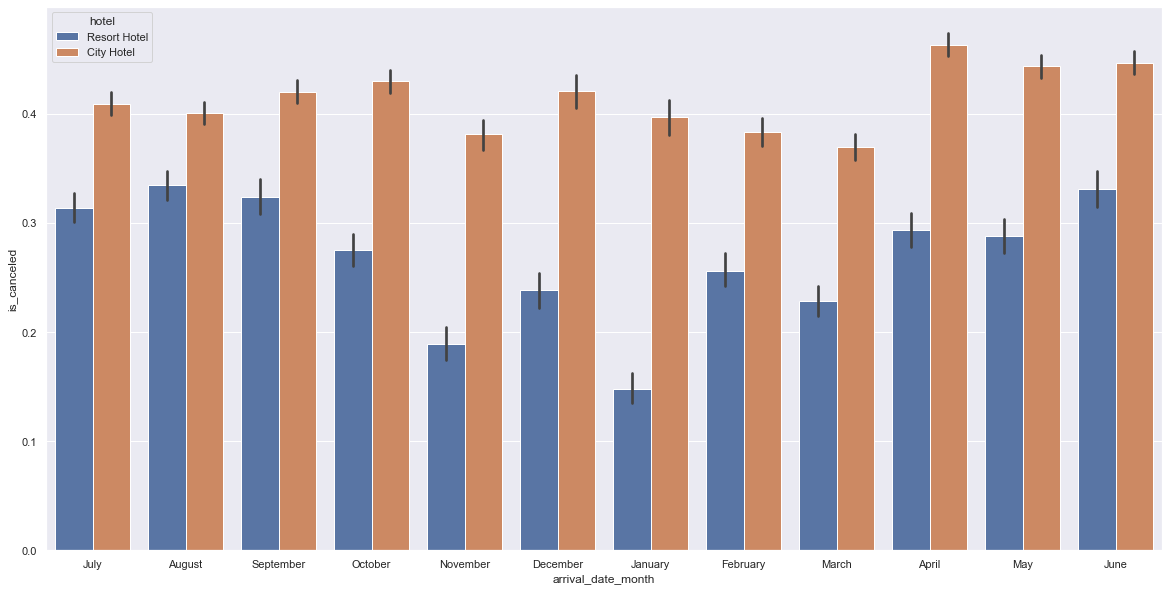

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x='arrival_date_month', y='is_canceled', hue='hotel', data=data)
plt.show()